# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

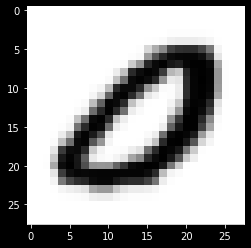

In [4]:
# Your code here
data=pd.read_csv('data_all.csv')
data.shape
##Observamos una 785 columnas, es decir cada row es un item, ya que son  28 x 28 pixeles. 28*28=784 (+1 de index)
data_x = data.iloc[:,1:]
data_y = data.iloc[:,0]

###
imagen_1 = [[0]*28]*28
imagen_1 = np.array(imagen_1)
for i in range(28):
    imagen_1[:,i]=data_x.iloc[1,i*28:i*28+28]

fig,ax = plt.subplots()
im = ax.imshow(imagen_1,cmap='Greys')

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [3]:
# Your code here
from sklearn import neighbors

n_neighbors = 2
weights = 'uniform'

model = neighbors.KNeighborsClassifier(n_neighbors, n_jobs = -1, weights=weights)
model.fit(data_x,data_y)

#Haremos uso de GridSearchCV, la cual es el proceso derealizar un ajuste de hiperparámetros para determinar los valores óptimos para un modelo dado
# Con GridSerachCV necesitamos otorgarles los parametros a evualar para que escoga el mejor modelo, en este caso colocamos los numeros de vecinos cervanos y la distancias

parameters = {"n_neighbors": np.arange(1,35,2), "metric": ["euclidean","cityblock"]}

tuned_model = GridSearchCV(model,parameters)
#Entrenamos el modelo con n_filas y total de columnas
tuned_model.fit(data_x[:10000],data_y[0:10000])

#Imprime los mejores parametros
bestparams = tuned_model.best_params_
print(bestparams)


model2 = neighbors.KNeighborsClassifier(n_neighbors = bestparams['n_neighbors'], n_jobs = -1, weights=weights, metric = bestparams['metric'])
model2.fit(data_x,data_y)
print(model2.score(data_x,data_y))

{'metric': 'euclidean', 'n_neighbors': 5}
0.8362218668867454


In [ ]:
#Observamos que la mejores parametros son: distancia----euclidiana y numero de vecinos-------5

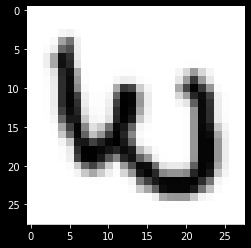

In [5]:
## Haremos unas de nuestro modelo
y_pred=model2.predict(data_x)

imagen_d = [[0]*28]*28
imagen_d = np.array(imagen_d)
for i in range(28):
    imagen_1[:,i]=data_x.iloc[2,i*28:i*28+28]

fig,ax = plt.subplots()
im = ax.imshow(imagen_1,cmap='Greys')




* Try to do the same thing with numbers.

In [5]:
# Your code here